## Практическая работа №13

#### Импорт библиотек

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import time

#### Загрузка, визуализация и преобразование данных в список

In [42]:
df = pd.read_csv('data.csv')

<AxesSubplot:>

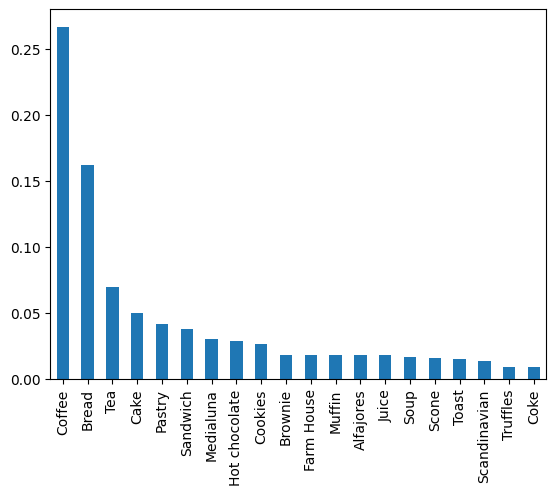

In [43]:
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')

In [44]:
transactions = []

for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

In [45]:
transactions[2]

['Muffin']

####  Работа с apriori_python

In [46]:
from apriori_python import apriori

In [47]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.03, minConf=0.1)

time1 = (time.perf_counter() - start)

t.append(time1)

In [48]:
rules

[[{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

#### Работа с apyori

In [49]:
from apyori import apriori

In [50]:
start = time.perf_counter()

rules = apriori(transactions=transactions, min_support=0.03,
                min_confidence=0.1, min_lift=1.0001)

results = list(rules)

time2 = (time.perf_counter() - start)

t.append(time2)

In [51]:
results

[RelationRecord(items=frozenset({'Cake', 'Coffee'}), support=0.05435466946484785, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Coffee'}), confidence=0.5269582909460834, lift=1.109079618532724), OrderedStatistic(items_base=frozenset({'Coffee'}), items_add=frozenset({'Cake'}), confidence=0.11439929328621908, lift=1.109079618532724)]),
 RelationRecord(items=frozenset({'Medialuna', 'Coffee'}), support=0.034942287513116475, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Medialuna'}), items_add=frozenset({'Coffee'}), confidence=0.5692307692307693, lift=1.1980497417776572)]),
 RelationRecord(items=frozenset({'Pastry', 'Coffee'}), support=0.0472193074501574, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Pastry'}), items_add=frozenset({'Coffee'}), confidence=0.5521472392638037, lift=1.162094344121919)]),
 RelationRecord(items=frozenset({'Sandwich', 'Coffee'}), support=0.037985309548793283, ordered_statistics=[OrderedStatis

In [52]:
#for result in results:
#    for subset in results[2]:
#        print(subset)
#        print(subset[0], subset[1])
#        print("Support: {supp}, Confidence: {conf}, Lift: {lft}" . format(result[1], subset[2], subset[3]))
#        print()

#### Работа с efficient_apriori

In [53]:
from efficient_apriori import apriori

In [54]:
start = time.perf_counter()

itemsets, rules = apriori(transactions, min_support=0.03, min_confidence=0.1)

time3 = (time.perf_counter() - start)

t.append(time3)

In [55]:
for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


#### Применение FP-Growth

In [56]:
from fpgrowth_py import fpgrowth

In [57]:
start = time.perf_counter()

itemsets, rules = fpgrowth(transactions, minSupRatio=0.03, minConf=0.1)

time4 = (time.perf_counter() - start)

t.append(time4)

In [58]:
for i in range(len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Tea'}, {'Bread'}, 0.19703703703703704]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]


#### Сравнение времени работы алгоритмов

<BarContainer object of 4 artists>

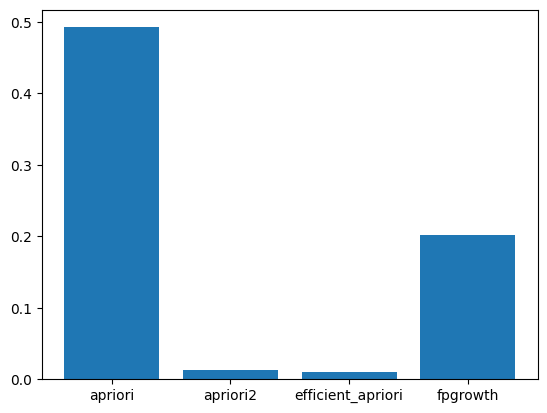

In [59]:
plt.bar(['apriori', 'apriori2', 'efficient_apriori', 'fpgrowth'], t)